## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
## loading the dataset and naming it

In [4]:
data = pd.read_csv("advertising.csv")



In [ ]:
## cleaning dataset and analyzing it

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
## 7.Clean the dataset and check if there are any duplicate data / NaN data etc still exists 

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#data.drop(['Unnamed: 0'], axis=1)

In [ ]:
## Simple linear regression 

In [ ]:
## 9. Graphical representation

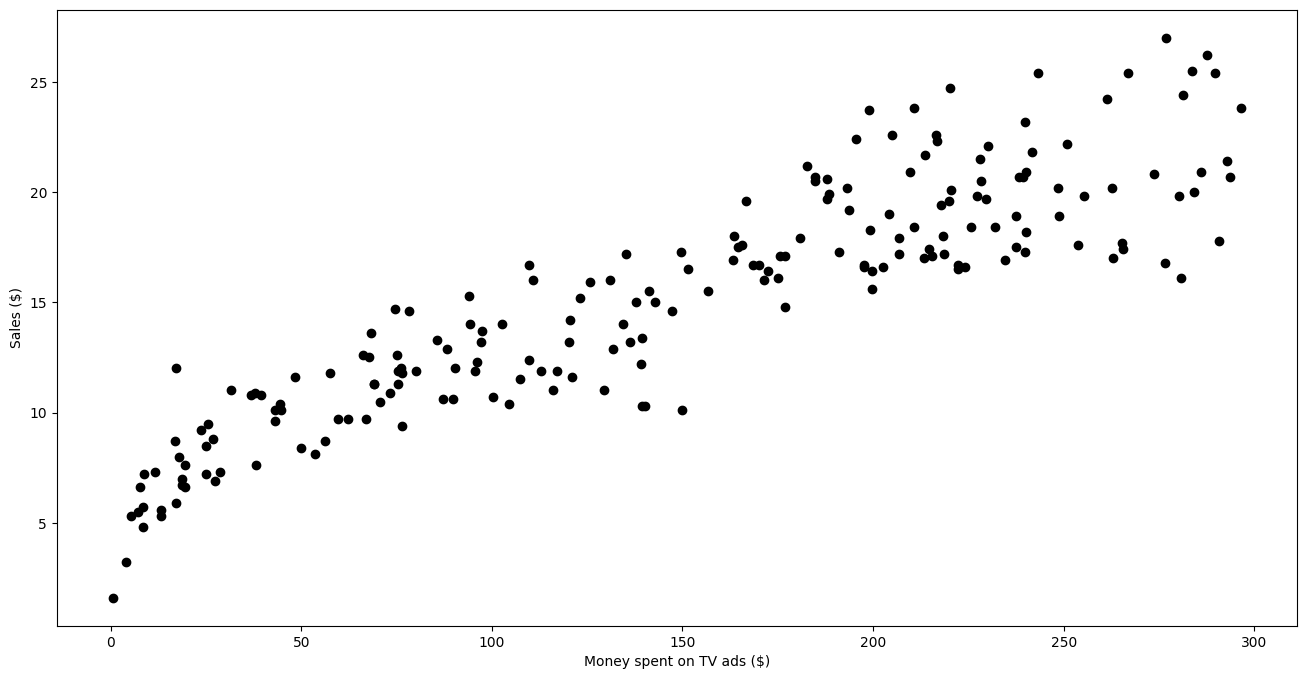

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

C:\Users\26266\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


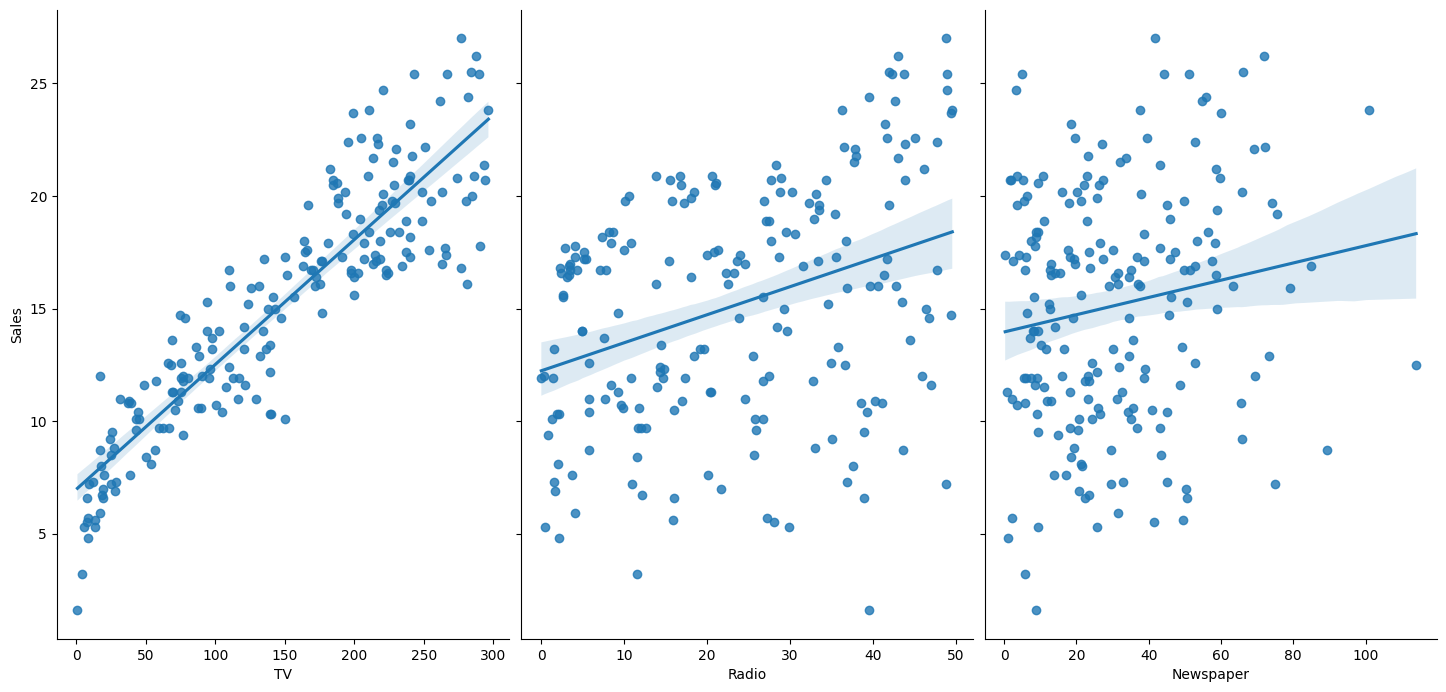

In [12]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [13]:
6. # Preparing X and y using pandas

# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Sales

# print the first 5 values
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [16]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Multiple linear regression 

In [17]:
# Splitting X and y into training and testing sets
# import  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [18]:
# Linear regression in scikit-learn
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [19]:
# Interpreting model coefficients

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


4.633808551125243
[0.05483762 0.10218027 0.00078783]


In [20]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [21]:
# Making predictions
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [ ]:
## 10.Error analysis

In [22]:
#  Computing the RMSE for our Sales predictions
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.5096109295725837


In [23]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio','Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.9895610775935795


In [ ]:
## Intercept and coffe calculations

In [24]:
#Intercept and Coefficient
print("Intercept: ", linreg.intercept_)
print("Coefficients:")
list(zip(X, linreg.coef_))

Intercept:  4.728630893324768
Coefficients:


[('TV', 0.05345308057871198),
 ('Radio', 0.11041756333934205),
 ('Newspaper', -4.371251349996608e-05)]

In [ ]:
## 11.Prediction using related data

In [26]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()
})

act_predict.head(5)

,Actual,Predict
0,11.3,10.690344
1,8.4,8.681324
2,12.0,9.592901
3,25.4,24.882413
4,16.7,14.686064


<AxesSubplot:>

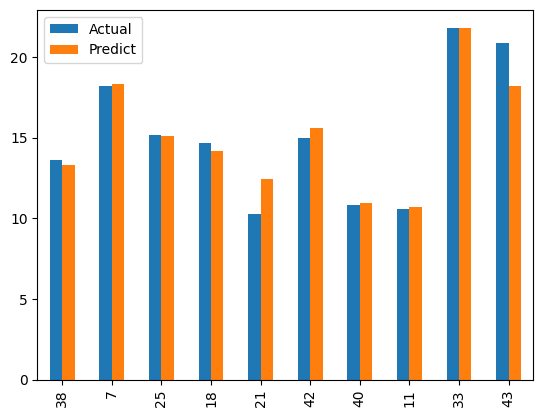

In [27]:
act_predict.sample(10).plot(kind='bar')

In [ ]:
## 9. Creating the Confusion matrix

In [41]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached

In [42]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1

In [43]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test_classes, y_pred_classes)

In [44]:
cm

array([[50]], dtype=int64)

<AxesSubplot:>

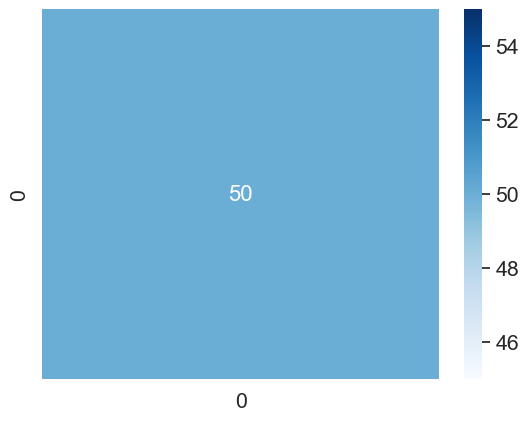

In [45]:
# cm.index.name='Actual Value'
# cm.columns.name='Predicted Value'
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})